<a href="https://colab.research.google.com/github/TemiloluwaAdeniyi/RangerRankProjectFolder/blob/front/Ranger_ML_Prediction_Model_Docker_%26_API_%26_Ranking_Model_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install & Load Neccesary Libraries**

In [ ]:
!pip install pickle
!pip install sklearn.externals
!pip install joblib

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
ERROR: Could not find a version that satisfies the requirement sklearn.externals (from versions: none)
ERROR: No matching distribution found for sklearn.externals


In [ ]:
#Import Libraries
import pandas as pd
from pandas import read_csv
import numpy as np
from numpy import set_printoptions
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

!pip install sn
!pip install boruta
from boruta import BorutaPy

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip install -q bentoml "h2o>=3.24.0.2"

In [ ]:
!pip install plotly

In [ ]:
import plotly.graph_objects as go

In [ ]:
!pip install bentoml==0.9.2

     |████████████████████████████████| 3.7MB 5.3MB/s 
  Found existing installation: BentoML 0.10.1
    Uninstalling BentoML-0.10.1:
      Successfully uninstalled BentoML-0.10.1


In [ ]:
import h2o
import bentoml

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9.1" 2020-11-04; OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8kq0djkv
  JVM stdout: /tmp/tmp8kq0djkv/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp8kq0djkv/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_unknownUser_imsj81
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


## **Load Data & Define Dataframe**

In [ ]:
#Load CSV File of Data into the Google Colab Environment
from google.colab import files
upload = files.upload()

Saving DeIdentified RASP1 Dataset_MAY2020.csv to DeIdentified RASP1 Dataset_MAY2020.csv


In [ ]:
#Store Data into Dataframe for Local Notebook Space
df = pd.read_csv('DeIdentified RASP1 Dataset_MAY2020.csv')

# **Graduate v.s Non-Graduate Split Pre-Cleaning and Wrangling**

In [ ]:
#Graduate v.s. Non-Graduate Split in Dataframe Pre-Cleaning and Wrangling
df['Graduate'].value_counts()

0    2583
1    1296
Name: Graduate, dtype: int64

In [ ]:
#Split of Graduates V.S. Non-Graduates of Dataframe Post Cleaning and Wrangling
#Extract the number of examples of each class
Non_Grads = df[df['Graduate'] == 0].shape[0]
Grads = df[df['Graduate'] == 1].shape[0]

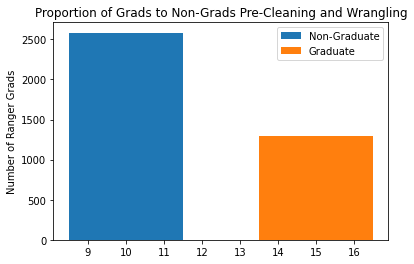

In [ ]:
#Bar plot of Graduates V.S. Non-Graduates
plt.bar(10,Non_Grads,3, label= 'Non-Graduate')
plt.bar(15,Grads,3, label='Graduate')
plt.legend()
plt.ylabel('Number of Ranger Grads')
plt.title('Proportion of Grads to Non-Grads Pre-Cleaning and Wrangling')
plt.show()

In [ ]:
#Doughnut Chart of Percentage Split of Non-Graduate v.s. Graduates Recruits
labels = ['Graduate','Non-Graduate']
values = [1296, 2583]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

# **Prepping/Cleaning Data**

In [ ]:
df.head()

,RN,Rank,Married,Airborne,Age,Education,Graduate,Remarks,MOS,SEX,GT Score,Pushup,Situp,Run,Chinup,Sick Call,Sick Call Reason,Information,Comprehension,Arithmetic,Similarities,Vocabulary,DS,PC,Spatial,PA,OA,V,P,FS,VRINr,TRINr,Fr,Fpr,Fs,FBSr,RBS,Lr,Kr,EID,...,PCT14,PCT15,RCL1,RCL2,RCL3,RCL4,RCL5,MCL1,MCL2,MCL3,MCL4,MCL5,FCL1,FCL2,FCL3,FCL4,FCL5,BCL1,BCL2,BCL3,BCL4,BCL5,MCP1,MCP2,MCP3,MCP4,MCP5,FCP1,FCP2,FCP3,FCP4,FCP5,BCP1,BCP2,BCP3,BCP4,BCP5,RCI,INF,MIS
0,1,PVT,1,0,24.0,12.0,0,Voluntary Withdrawl,11B,M,117.0,50.0,58.0,0:00,11.0,0,NaN,45.0,44.0,58.0,51.0,43.0,47.0,53.0,48.0,37.0,40.0,98.0,92.0,95.0,48,57,47,42,50,51,54,42,48,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,PVT,0,1,23.0,10.0,1,Graduated,11C,M,106.0,63.0,78.0,13:12,9.0,0,NaN,54.0,46.0,36.0,40.0,45.0,53.0,46.0,59.0,44.0,49.0,92.0,101.0,96.0,58,50,56,51,50,51,46,57,59,46,...,58.0,50.0,38.0,16.0,37.0,19.0,40.0,44.0,37.0,51.0,48.0,56.0,44.0,31.0,52.0,55.0,52.0,44.0,34.0,52.0,51.0,54.0,27.0,10.0,54.0,42.0,73.0,27.0,3.0,58.0,69.0,58.0,27.0,5.0,58.0,54.0,66.0,0.80,23.0,0.0
2,3,SPC,0,1,23.0,16.0,0,Voluntary Withdrawl,18X,M,119.0,NaN,NaN,NaN,NaN,0,NaN,63.0,61.0,55.0,64.0,61.0,55.0,55.0,58.0,51.0,57.0,118.0,111.0,116.0,43,57,42,51,42,45,59,62,42,53,...,46.0,50.0,28.0,23.0,20.0,10.0,40.0,35.0,44.0,34.0,35.0,56.0,35.0,38.0,35.0,40.0,52.0,35.0,41.0,34.0,37.0,54.0,7.0,27.0,5.0,7.0,73.0,7.0,12.0,7.0,16.0,58.0,7.0,18.0,5.0,10.0,66.0,0.72,18.0,0.0
3,4,PVT,0,0,18.0,12.0,0,Psych Failure,11B,M,115.0,58.0,69.0,13:24,4.0,0,NaN,58.0,55.0,50.0,58.0,60.0,50.0,63.0,58.0,60.0,61.0,111.0,117.0,114.0,43,50,42,51,50,54,50,42,31,66,...,21.0,7.0,52.0,41.0,18.0,15.0,21.0,56.0,63.0,32.0,42.0,33.0,56.0,57.0,33.0,48.0,29.0,56.0,60.0,32.0,45.0,31.0,73.0,90.0,4.0,21.0,4.0,73.0,76.0,4.0,42.0,2.0,73.0,84.0,4.0,31.0,3.0,0.87,19.0,0.0
4,5,PVT,1,0,25.0,12.0,0,APFT Failure,11B,M,126.0,48.0,69.0,16:14,4.0,0,NaN,44.0,57.0,58.0,58.0,53.0,63.0,63.0,54.0,37.0,61.0,107.0,112.0,110.0,34,57,42,51,50,35,46,47,55,43,...,92.0,73.0,39.0,25.0,38.0,17.0,50.0,45.0,46.0,52.0,45.0,68.0,45.0,40.0,54.0,51.0,65.0,45.0,43.0,53.0,48.0,66.0,31.0,34.0,58.0,31.0,96.0,31.0,16.0,66.0,54.0,93.0,31.0,24.0,62.0,42.0,95.0,0.57,15.0,0.0


In [ ]:
#Summary of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879 entries, 0 to 3878
Columns: 226 entries, RN to MIS
dtypes: float64(163), int64(57), object(6)
memory usage: 6.7+ MB


In [ ]:
#List Column Names
list(df.columns.values)

['RN',
 'Rank',
 'Married',
 'Airborne',
 'Age',
 'Education',
 'Graduate',
 'Remarks',
 'MOS',
 'SEX',
 'GT Score',
 'Pushup',
 'Situp',
 'Run',
 'Chinup',
 'Sick Call',
 'Sick Call Reason',
 'Information',
 'Comprehension',
 'Arithmetic',
 'Similarities',
 'Vocabulary',
 'DS',
 'PC',
 'Spatial',
 'PA',
 'OA',
 'V',
 'P',
 'FS',
 'VRINr',
 'TRINr',
 'Fr',
 'Fpr',
 'Fs',
 'FBSr',
 'RBS',
 'Lr',
 'Kr',
 'EID',
 'THD',
 'BXD',
 'RCd',
 'RC1',
 'RC2',
 'RC3',
 'RC4',
 'RC6',
 'RC7',
 'RC8',
 'RC9',
 'MLS',
 'HPC',
 'NUC',
 'GIC',
 'SUI',
 'HLP',
 'SFD',
 'NFC',
 'COG',
 'STW',
 'AXY',
 'ANP',
 'BRF',
 'MSF',
 'JCP',
 'SUB',
 'AGG',
 'ACT',
 'FML',
 'IPP',
 'SAV',
 'SHY',
 'DSF',
 'AES',
 'MEC',
 'AGGRr',
 'PSYCr',
 'DISCr',
 'NEGEr',
 'INTRr',
 'CS',
 'PCT T',
 'S1',
 'S2',
 'S3',
 'S4',
 'S5',
 'S6',
 'S7',
 'S8',
 'S9',
 'S10',
 'S11',
 'S12',
 'S13',
 'S14',
 'S15',
 'MTS1',
 'MTS2',
 'MTS3',
 'MTS4',
 'MTS5',
 'MTS6',
 'MTS7',
 'MTS8',
 'MTS9',
 'MTS10',
 'MTS11',
 'MTS12',
 'MTS13',


In [ ]:
#Check Size of Data (rows x columns) before cleaning
df.shape

(3879, 226)

In [ ]:
#Drop Duplicate Recruit Entries and Define Second Dataframe
df = df.drop_duplicates()

In [ ]:
#Drop Recruit Entries with Any Missing Values or N/A
df = df.dropna(how='any')

In [ ]:
#Drop the Remarks Column
#Remarks are added to the recruit profiles only after the psych and medical team manually review the recruits.
#This model will only consider the data available before this review process occurs to optimize the review process and to allow the model to be used as a tool during this stage.
df = df.drop(['Remarks'], axis=1)

In [ ]:
#Convert the Run Times to Decimal Formati
time_string = df.Run
HMS = [60*60, 60, 1]
for t in time_string:
    dec_time = sum(a * b for a,b in zip(HMS, map(int, t.split(":"))))
    dec_time /= 3600.
    print (dec_time)

13.566666666666666
17.333333333333332
13.933333333333334
13.166666666666666
14.183333333333334
13.1
12.766666666666667
12.3
15.183333333333334
12.666666666666666
12.55
13.7
15.3
13.083333333333334
14.4
13.2
14.4
13.25
12.666666666666666
14.266666666666667
12.55
12.5
12.366666666666667
14.133333333333333
13.85
14.55
13.333333333333334
13.6
15.583333333333334
14.9
14.966666666666667
13.833333333333334
14.866666666666667
13.716666666666667
14.183333333333334
14.516666666666667
12.55
12.45
14.6
14.55
13.066666666666666
14.316666666666666
17.416666666666668
15.6
14.266666666666667
13.15
12.666666666666666
15.283333333333333
14.9
13.283333333333333
14.133333333333333
15.883333333333333
13.866666666666667
15.466666666666667
15.733333333333333
13.833333333333334
14.016666666666667
13.166666666666666
14.133333333333333
14.233333333333333
14.6
11.583333333333334
14.45
14.583333333333334
13.616666666666667
14.633333333333333
14.7
14.516666666666667
12.933333333333334
13.7
13.433333333333334
13.63

In [ ]:
#Load CSV File of Data into the Google Colab Environment
from google.colab import files
upload = files.upload()

Saving Cleaned_DeIdentified_RASP1_Dataset_MAY2020_Run_Formatted - Cleaned_DeIdentified_RASP1_Dataset_MAY2020 (2).csv to Cleaned_DeIdentified_RASP1_Dataset_MAY2020_Run_Formatted - Cleaned_DeIdentified_RASP1_Dataset_MAY2020 (2).csv


In [ ]:
#Store Data into Dataframe for Local Notebook Space
df_2 = pd.read_csv('Cleaned_DeIdentified_RASP1_Dataset_MAY2020_Run_Formatted - Cleaned_DeIdentified_RASP1_Dataset_MAY2020 (2).csv')

In [ ]:
#Check Dataframe Summary Post Cleaning and Wrangling
df_2.head()

,Unnamed: 0,RN,Rank,Married,Airborne,Age,Education,Graduate,MOS,SEX,GT Score,Pushup,Situp,Run,Chinup,Sick Call,Sick Call Reason,Information,Comprehension,Arithmetic,Similarities,Vocabulary,DS,PC,Spatial,PA,OA,V,P,FS,VRINr,TRINr,Fr,Fpr,Fs,FBSr,RBS,Lr,Kr,EID,...,PCT14,PCT15,RCL1,RCL2,RCL3,RCL4,RCL5,MCL1,MCL2,MCL3,MCL4,MCL5,FCL1,FCL2,FCL3,FCL4,FCL5,BCL1,BCL2,BCL3,BCL4,BCL5,MCP1,MCP2,MCP3,MCP4,MCP5,FCP1,FCP2,FCP3,FCP4,FCP5,BCP1,BCP2,BCP3,BCP4,BCP5,RCI,INF,MIS
0,16,17,PV2,0,0,18,12,0,11B,M,109,73,81,13.566667,4,1,L HIP PAIN,46,48,60,58,43,48,47,57,46,52,102,101,102,34,57,42,51,50,58,50,57,52,45,...,76,27,22,17,31,13,39,30,38,45,39,54,30,32,46,45,51,30,35,46,42,53,2,12,31,14,66,2,4,34,31,54,2,7,34,21,62,0.79,25,0
1,45,46,PFC,0,0,23,15,0,11B,M,115,58,66,17.333333,4,1,heat injury,47,42,46,53,43,51,50,52,54,61,94,107,100,43,57,56,51,58,45,50,76,59,38,...,58,88,55,25,40,19,41,58,46,54,48,57,58,40,56,55,54,58,43,55,51,55,79,34,66,42,76,79,16,73,69,66,79,24,69,54,69,0.64,19,0
2,54,55,PV2,0,1,19,12,0,68W,M,111,65,78,13.933333,10,1,ALLERGIES,46,50,50,51,53,44,47,69,53,69,101,114,107,63,50,47,42,58,45,42,57,52,48,...,76,50,33,34,31,21,39,40,56,45,51,54,40,49,46,58,51,40,52,46,55,53,16,73,31,54,66,16,46,34,79,54,16,58,34,69,62,-0.38,22,0
3,65,66,PFC,0,1,23,12,0,35F,M,99,67,65,13.166667,11,1,LOWER BACK PAIN,45,38,39,37,47,41,48,24,51,51,87,88,87,53,57,42,42,42,51,46,76,69,43,...,66,96,64,20,45,33,49,66,41,59,69,66,66,35,61,78,64,66,38,60,73,65,95,18,82,97,95,95,7,86,99,92,95,12,84,99,93,0.87,21,0
4,76,77,PVT,0,0,18,12,0,11B,M,114,62,64,14.183333,4,1,Foot pain,62,55,54,56,62,62,49,59,56,61,113,116,115,58,50,47,42,42,42,54,66,52,48,...,58,62,53,27,36,14,41,56,48,50,41,57,56,42,51,46,54,56,45,51,44,55,73,42,50,18,76,73,21,54,34,66,73,31,54,27,69,0.64,12,0


In [ ]:
#Check Size of the Dataframe Post Cleaning
df_2.shape

(450, 226)

Post cleaning and wrangling, the size of the dataset decreased significantly from 3,789 recruits in the initial pool for analysis to 450 recruits. This decrease in size occurred from removing recruits that had missing values or NA for any of the data points. Theses 450 individuals with complete profiles provide the best data to use in developing the model.

In [ ]:
df_2

,Unnamed: 0,RN,Rank,Married,Airborne,Age,Education,Graduate,MOS,SEX,GT Score,Pushup,Situp,Run,Chinup,Sick Call,Sick Call Reason,Information,Comprehension,Arithmetic,Similarities,Vocabulary,DS,PC,Spatial,PA,OA,V,P,FS,VRINr,TRINr,Fr,Fpr,Fs,FBSr,RBS,Lr,Kr,EID,...,PCT14,PCT15,RCL1,RCL2,RCL3,RCL4,RCL5,MCL1,MCL2,MCL3,MCL4,MCL5,FCL1,FCL2,FCL3,FCL4,FCL5,BCL1,BCL2,BCL3,BCL4,BCL5,MCP1,MCP2,MCP3,MCP4,MCP5,FCP1,FCP2,FCP3,FCP4,FCP5,BCP1,BCP2,BCP3,BCP4,BCP5,RCI,INF,MIS
0,16,17,PV2,0,0,18,12,0,11B,M,109,73,81,13.566667,4,1,L HIP PAIN,46,48,60,58,43,48,47,57,46,52,102,101,102,34,57,42,51,50,58,50,57,52,45,...,76,27,22,17,31,13,39,30,38,45,39,54,30,32,46,45,51,30,35,46,42,53,2,12,31,14,66,2,4,34,31,54,2,7,34,21,62,0.79,25,0
1,45,46,PFC,0,0,23,15,0,11B,M,115,58,66,17.333333,4,1,heat injury,47,42,46,53,43,51,50,52,54,61,94,107,100,43,57,56,51,58,45,50,76,59,38,...,58,88,55,25,40,19,41,58,46,54,48,57,58,40,56,55,54,58,43,55,51,55,79,34,66,42,76,79,16,73,69,66,79,24,69,54,69,0.64,19,0
2,54,55,PV2,0,1,19,12,0,68W,M,111,65,78,13.933333,10,1,ALLERGIES,46,50,50,51,53,44,47,69,53,69,101,114,107,63,50,47,42,58,45,42,57,52,48,...,76,50,33,34,31,21,39,40,56,45,51,54,40,49,46,58,51,40,52,46,55,53,16,73,31,54,66,16,46,34,79,54,16,58,34,69,62,-0.38,22,0
3,65,66,PFC,0,1,23,12,0,35F,M,99,67,65,13.166667,11,1,LOWER BACK PAIN,45,38,39,37,47,41,48,24,51,51,87,88,87,53,57,42,42,42,51,46,76,69,43,...,66,96,64,20,45,33,49,66,41,59,69,66,66,35,61,78,64,66,38,60,73,65,95,18,82,97,95,95,7,86,99,92,95,12,84,99,93,0.87,21,0
4,76,77,PVT,0,0,18,12,0,11B,M,114,62,64,14.183333,4,1,Foot pain,62,55,54,56,62,62,49,59,56,61,113,116,115,58,50,47,42,42,42,54,66,52,48,...,58,62,53,27,36,14,41,56,48,50,41,57,56,42,51,46,54,56,45,51,44,55,73,42,50,18,76,73,21,54,34,66,73,31,54,27,69,0.64,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,3810,3811,PVT,0,1,18,12,0,11B,M,108,56,78,12.983333,9,1,dermatitis,55,48,57,63,60,56,46,56,56,56,111,109,111,34,57,47,42,50,42,46,62,52,41,...,21,73,52,32,45,31,35,56,54,59,66,50,56,47,61,75,46,56,50,60,70,48,73,66,82,95,50,73,38,86,99,34,73,50,84,98,42,0.73,18,0
446,3820,3821,PV2,0,0,18,13,1,11B,M,105,62,77,12.783333,4,1,dental operation,46,48,57,56,41,42,42,50,53,63,100,101,100,34,50,42,51,42,58,50,86,62,38,...,95,73,57,26,41,5,51,60,47,55,27,69,60,41,57,31,66,60,44,56,30,67,84,38,69,1,97,84,18,76,3,95,84,27,73,2,96,0.75,18,4
447,3831,3832,PV2,0,0,18,12,0,11B,M,113,66,80,14.166667,4,1,HEAT INJURY,47,55,63,56,52,48,55,58,46,46,108,102,105,43,50,42,42,42,45,50,76,66,33,...,76,88,46,18,45,22,46,50,39,59,53,63,51,33,61,60,60,51,36,60,56,61,50,14,82,62,90,54,4,86,84,84,54,8,84,73,86,0.70,16,0
448,3842,3843,PV2,1,0,18,12,0,11B,M,109,58,73,13.350000,4,1,KNEE PAIN,35,46,57,55,49,48,47,48,43,44,98,93,95,39,50,42,42,42,48,42,57,72,33,...,58,27,48,14,47,13,37,52,35,61,39,52,52,28,63,45,49,52,32,62,42,50,58,7,86,14,58,58,1,90,31,46,58,4,88,21,50,0.80,13,0


# **Graduate v.s Non-Graduate Split Post-Cleaning and Wrangling**

In [ ]:
df_2['Graduate'].value_counts()

0    322
1    128
Name: Graduate, dtype: int64

In [ ]:
#Summary of the Dataset Post Cleaning and Wrangling
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Columns: 226 entries, Unnamed: 0 to MIS
dtypes: float64(2), int64(220), object(4)
memory usage: 794.7+ KB


In [ ]:
#Split of Graduates V.S. Non-Graduates of Dataframe Post Cleaning and Wrangling
#Extract the number of examples of each class
Non_Grads = df_2[df_2['Graduate'] == 0].shape[0]
Grads = df_2[df_2['Graduate'] == 1].shape[0]

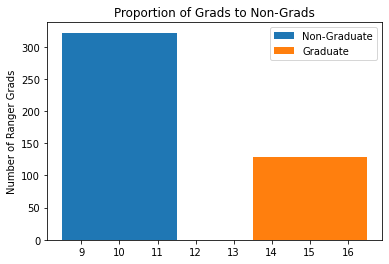

In [ ]:
#Bar plot of Graduates V.S. Non-Graduates
plt.bar(10,Non_Grads,3, label= 'Non-Graduate')
plt.bar(15,Grads,3, label='Graduate')
plt.legend()
plt.ylabel('Number of Ranger Grads')
plt.title('Proportion of Grads to Non-Grads')
plt.show()

In [ ]:
#Doughnut Chart of Percentage Split of Non-Graduate v.s. Graduates Recruits
labels = ['Graduate','Non-Graduate']
values = [128, 322]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

# **Export Cleaned and Wrangled Dataframe as New CSV and Save in Workspace**

In [ ]:
df_2

,Unnamed: 0,RN,Rank,Married,Airborne,Age,Education,Graduate,MOS,SEX,GT Score,Pushup,Situp,Run,Chinup,Sick Call,Sick Call Reason,Information,Comprehension,Arithmetic,Similarities,Vocabulary,DS,PC,Spatial,PA,OA,V,P,FS,VRINr,TRINr,Fr,Fpr,Fs,FBSr,RBS,Lr,Kr,EID,...,PCT14,PCT15,RCL1,RCL2,RCL3,RCL4,RCL5,MCL1,MCL2,MCL3,MCL4,MCL5,FCL1,FCL2,FCL3,FCL4,FCL5,BCL1,BCL2,BCL3,BCL4,BCL5,MCP1,MCP2,MCP3,MCP4,MCP5,FCP1,FCP2,FCP3,FCP4,FCP5,BCP1,BCP2,BCP3,BCP4,BCP5,RCI,INF,MIS
0,16,17,PV2,0,0,18,12,0,11B,M,109,73,81,13.566667,4,1,L HIP PAIN,46,48,60,58,43,48,47,57,46,52,102,101,102,34,57,42,51,50,58,50,57,52,45,...,76,27,22,17,31,13,39,30,38,45,39,54,30,32,46,45,51,30,35,46,42,53,2,12,31,14,66,2,4,34,31,54,2,7,34,21,62,0.79,25,0
1,45,46,PFC,0,0,23,15,0,11B,M,115,58,66,17.333333,4,1,heat injury,47,42,46,53,43,51,50,52,54,61,94,107,100,43,57,56,51,58,45,50,76,59,38,...,58,88,55,25,40,19,41,58,46,54,48,57,58,40,56,55,54,58,43,55,51,55,79,34,66,42,76,79,16,73,69,66,79,24,69,54,69,0.64,19,0
2,54,55,PV2,0,1,19,12,0,68W,M,111,65,78,13.933333,10,1,ALLERGIES,46,50,50,51,53,44,47,69,53,69,101,114,107,63,50,47,42,58,45,42,57,52,48,...,76,50,33,34,31,21,39,40,56,45,51,54,40,49,46,58,51,40,52,46,55,53,16,73,31,54,66,16,46,34,79,54,16,58,34,69,62,-0.38,22,0
3,65,66,PFC,0,1,23,12,0,35F,M,99,67,65,13.166667,11,1,LOWER BACK PAIN,45,38,39,37,47,41,48,24,51,51,87,88,87,53,57,42,42,42,51,46,76,69,43,...,66,96,64,20,45,33,49,66,41,59,69,66,66,35,61,78,64,66,38,60,73,65,95,18,82,97,95,95,7,86,99,92,95,12,84,99,93,0.87,21,0
4,76,77,PVT,0,0,18,12,0,11B,M,114,62,64,14.183333,4,1,Foot pain,62,55,54,56,62,62,49,59,56,61,113,116,115,58,50,47,42,42,42,54,66,52,48,...,58,62,53,27,36,14,41,56,48,50,41,57,56,42,51,46,54,56,45,51,44,55,73,42,50,18,76,73,21,54,34,66,73,31,54,27,69,0.64,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,3810,3811,PVT,0,1,18,12,0,11B,M,108,56,78,12.983333,9,1,dermatitis,55,48,57,63,60,56,46,56,56,56,111,109,111,34,57,47,42,50,42,46,62,52,41,...,21,73,52,32,45,31,35,56,54,59,66,50,56,47,61,75,46,56,50,60,70,48,73,66,82,95,50,73,38,86,99,34,73,50,84,98,42,0.73,18,0
446,3820,3821,PV2,0,0,18,13,1,11B,M,105,62,77,12.783333,4,1,dental operation,46,48,57,56,41,42,42,50,53,63,100,101,100,34,50,42,51,42,58,50,86,62,38,...,95,73,57,26,41,5,51,60,47,55,27,69,60,41,57,31,66,60,44,56,30,67,84,38,69,1,97,84,18,76,3,95,84,27,73,2,96,0.75,18,4
447,3831,3832,PV2,0,0,18,12,0,11B,M,113,66,80,14.166667,4,1,HEAT INJURY,47,55,63,56,52,48,55,58,46,46,108,102,105,43,50,42,42,42,45,50,76,66,33,...,76,88,46,18,45,22,46,50,39,59,53,63,51,33,61,60,60,51,36,60,56,61,50,14,82,62,90,54,4,86,84,84,54,8,84,73,86,0.70,16,0
448,3842,3843,PV2,1,0,18,12,0,11B,M,109,58,73,13.350000,4,1,KNEE PAIN,35,46,57,55,49,48,47,48,43,44,98,93,95,39,50,42,42,42,48,42,57,72,33,...,58,27,48,14,47,13,37,52,35,61,39,52,52,28,63,45,49,52,32,62,42,50,58,7,86,14,58,58,1,90,31,46,58,4,88,21,50,0.80,13,0


In [ ]:
#Store Data into Dataframe for Local Notebook Space
df_5 = pd.read_csv('')

In [ ]:
from google.colab import files
df_2.to_csv('Final_Cleaned_DeIdentified_RASP1_Dataset_MAY2020_3.csv') 
files.download('Final_Cleaned_DeIdentified_RASP1_Dataset_MAY2020_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Load Cleaned Datafrmae into H2O Workspace**

In [ ]:
#Store Data into Dataframe for H2o Workspace
df_2 = h2o.upload_file("Final_Cleaned_DeIdentified_RASP1_Dataset_MAY2020_3.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
df_2
#Observe added column "C1" from Google Colab. This needs to be removed before the next part of the model development begins.

C1,Unnamed: 0,RN,Rank,Married,Airborne,Age,Education,Graduate,MOS,SEX,GT Score,Pushup,Situp,Run,Chinup,Sick Call,Sick Call Reason,Information,Comprehension,Arithmetic,Similarities,Vocabulary,DS,PC,Spatial,PA,OA,V,P,FS,VRINr,TRINr,Fr,Fpr,Fs,FBSr,RBS,Lr,Kr,EID,THD,BXD,RCd,RC1,RC2,RC3,RC4,RC6,RC7,RC8,RC9,MLS,HPC,NUC,GIC,SUI,HLP,SFD,NFC,COG,STW,AXY,ANP,BRF,MSF,JCP,SUB,AGG,ACT,FML,IPP,SAV,SHY,DSF,AES,MEC,AGGRr,PSYCr,DISCr,NEGEr,INTRr,CS,PCT T,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,MTS1,MTS2,MTS3,MTS4,MTS5,MTS6,MTS7,MTS8,MTS9,MTS10,MTS11,MTS12,MTS13,MTS14,MTS15,FTS1,FTS2,FTS3,FTS4,FTS5,FTS6,FTS7,FTS8,FTS9,FTS10,FTS11,FTS12,FTS13,FTS14,FTS15,TSC1,TSC2,TSC3,TSC4,TSC5,TSC6,TSC7,TSC8,TSC9,TSC10,TSC11,TSC12,TSC13,TSC14,TSC15,MPC1,MPC2,MPC3,MPC4,MPC5,MPC6,MPC7,MPC8,MPC9,MPC10,MPC11,MPC12,MPC13,MPC14,MPC15,FPC1,FPC2,FPC3,FPC4,FPC5,FPC6,FPC7,FPC8,FPC9,FPC10,FPC11,FPC12,FPC13,FPC14,FPC15,PCT1,PCT2,PCT3,PCT4,PCT5,PCT6,PCT7,PCT8,PCT9,PCT10,PCT11,PCT12,PCT13,PCT14,PCT15,RCL1,RCL2,RCL3,RCL4,RCL5,MCL1,MCL2,MCL3,MCL4,MCL5,FCL1,FCL2,FCL3,FCL4,FCL5,BCL1,BCL2,BCL3,BCL4,BCL5,MCP1,MCP2,MCP3,MCP4,MCP5,FCP1,FCP2,FCP3,FCP4,FCP5,BCP1,BCP2,BCP3,BCP4,BCP5,RCI,INF,MIS
0,16,17,PV2,0,0,18,12,0,11B,M,109,73,81,13.5667,4,1,L HIP PAIN,46,48,60,58,43,48,47,57,46,52,102,101,102,34,57,42,51,50,58,50,57,52,45,48,48,42,54,54,51,43,56,46,39,45,52,65,53,46,45,52,42,48,54,52,44,39,43,42,40,55,51,39,44,56,55,37,44,33,52,43,38,51,47,57,0,30,6,3,6,7,6,7,4,4,14,13,6,7,14,13,12,40,33,33,36,39,43,40,38,52,50,38,44,55,58,46,38,32,38,34,30,38,39,35,53,54,40,51,54,56,41,39,32,36,35,36,41,39,36,52,52,39,47,54,57,44,16,4,4,8,14,24,16,12,58,50,12,27,69,79,34,12,4,12,5,2,12,14,7,62,66,16,54,66,73,18,14,4,8,7,8,18,14,8,58,58,14,38,66,76,27,22,17,31,13,39,30,38,45,39,54,30,32,46,45,51,30,35,46,42,53,2,12,31,14,66,2,4,34,31,54,2,7,34,21,62,0.79,25,0
1,45,46,PFC,0,0,23,15,0,11B,M,115,58,66,17.3333,4,1,heat injury,47,42,46,53,43,51,50,52,54,61,94,107,100,43,57,56,51,58,45,50,76,59,38,67,50,46,54,34,54,39,56,46,70,58,38,65,41,46,45,40,42,48,40,47,44,47,43,42,40,41,51,59,44,43,43,47,44,33,78,69,63,56,40,36,0,41,8,15,16,16,13,7,5,10,13,17,6,13,12,11,18,46,59,55,63,56,43,43,51,49,60,38,57,50,53,63,44,58,58,62,48,38,41,49,51,64,40,66,49,51,61,45,59,57,62,52,41,42,50,50,62,39,60,49,52,62,34,82,69,90,73,24,24,54,46,84,12,76,50,62,90,27,79,79,88,42,12,18,46,54,92,16,95,46,54,86,31,82,76,88,58,18,21,50,50,88,14,84,46,58,88,55,25,40,19,41,58,46,54,48,57,58,40,56,55,54,58,43,55,51,55,79,34,66,42,76,79,16,73,69,66,79,24,69,54,69,0.64,19,0
2,54,55,PV2,0,1,19,12,0,68W,M,111,65,78,13.9333,10,1,ALLERGIES,46,50,50,51,53,44,47,69,53,69,101,114,107,63,50,47,42,58,45,42,57,52,48,63,57,51,47,46,57,49,70,52,59,58,46,42,53,46,45,40,52,51,54,47,44,47,43,42,57,41,56,59,37,52,43,47,44,50,69,47,63,63,49,39,0,43,7,7,10,9,12,9,13,9,12,10,9,12,12,13,14,43,42,42,42,54,47,63,49,47,42,47,55,50,58,52,41,41,46,40,45,42,60,47,49,46,49,63,49,56,47,42,41,44,41,50,45,62,48,48,44,48,58,49,57,50,24,21,21,21,66,38,90,46,38,21,38,69,50,79,58,18,18,34,16,31,21,84,38,46,34,46,90,46,73,38,21,18,27,18,50,31,88,42,42,27,42,79,46,76,50,33,34,31,21,39,40,56,45,51,54,40,49,46,58,51,40,52,46,55,53,16,73,31,54,66,16,46,34,79,54,16,58,34,69,62,-0.38,22,0
3,65,66,PFC,0,1,23,12,0,35F,M,99,67,65,13.1667,11,1,LOWER BACK PAIN,45,38,39,37,47,41,48,24,51,51,87,88,87,53,57,42,42,42,51,46,76,69,43,39,36,42,42,42,41,43,56,38,39,36,38,42,53,46,45,40,42,36,40,47,44,39,43,36,40,41,37,44,37,46,50,37,44,62,61,50,38,44,40,49,0,30,10,20,16,18,9,4,7,12,17,16,17,16,17,12,20,52,70,55,69,46,36,48,56,59,57,69,63,63,55,69,50,69,58,68,37,30,46,54,59,62,71,73,62,53,67,51,70,57,68,43,34,47,55,59,59,70,67,62,54,68,58,98,69,97,34,8,42,73,82,76,97,90,90,69,97,50,97,79,96,10,2,34,66,82,88,98,99,88,62,96,54,98,76,96,24,5,38,69,82,82,98,96,88,66,96,64,20,45,33,49,66,41,59,69,66,66,35,61,78,64,66,38,60,73,65,95,18,82,97,95,95,7,86,99,92,95,12,84,99,93,0.87,21,0
4,76,77,PVT,0,0,18,12,0,11B,M,114,62,64,14.1833,4,1,Foot pain,62,55,54,56,62,62,49,59,56,61,113,116,115

In [ ]:
#Remove the Unamed:0 Column Added by Google Colab
df_2 = df_2.drop(['C1'], axis=1)

In [ ]:
#Remove the C1 Column Added by Google Colab
df_2 = df_2.drop(['Unnamed: 0'], axis=1)

In [ ]:
df_2.describe()

Rows:450
Cols:225




,RN,Rank,Married,Airborne,Age,Education,Graduate,MOS,SEX,GT Score,Pushup,Situp,Run,Chinup,Sick Call,Sick Call Reason,Information,Comprehension,Arithmetic,Similarities,Vocabulary,DS,PC,Spatial,PA,OA,V,P,FS,VRINr,TRINr,Fr,Fpr,Fs,FBSr,RBS,Lr,Kr,EID,THD,BXD,RCd,RC1,RC2,RC3,RC4,RC6,RC7,RC8,RC9,MLS,HPC,NUC,GIC,SUI,HLP,SFD,NFC,COG,STW,AXY,ANP,BRF,MSF,JCP,SUB,AGG,ACT,FML,IPP,SAV,SHY,DSF,AES,MEC,AGGRr,PSYCr,DISCr,NEGEr,INTRr,CS,PCT T,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,MTS1,MTS2,MTS3,MTS4,MTS5,MTS6,MTS7,MTS8,MTS9,MTS10,MTS11,MTS12,MTS13,MTS14,MTS15,FTS1,FTS2,FTS3,FTS4,FTS5,FTS6,FTS7,FTS8,FTS9,FTS10,FTS11,FTS12,FTS13,FTS14,FTS15,TSC1,TSC2,TSC3,TSC4,TSC5,TSC6,TSC7,TSC8,TSC9,TSC10,TSC11,TSC12,TSC13,TSC14,TSC15,MPC1,MPC2,MPC3,MPC4,MPC5,MPC6,MPC7,MPC8,MPC9,MPC10,MPC11,MPC12,MPC13,MPC14,MPC15,FPC1,FPC2,FPC3,FPC4,FPC5,FPC6,FPC7,FPC8,FPC9,FPC10,FPC11,FPC12,FPC13,FPC14,FPC15,PCT1,PCT2,PCT3,PCT4,PCT5,PCT6,PCT7,PCT8,PCT9,PCT10,PCT11,PCT12,PCT13,PCT14,PCT15,RCL1,RCL2,RCL3,RCL4,RCL5,MCL1,MCL2,MCL3,MCL4,MCL5,FCL1,FCL2,FCL3,FCL4,FCL5,BCL1,BCL2,BCL3,BCL4,BCL5,MCP1,MCP2,MCP3,MCP4,MCP5,FCP1,FCP2,FCP3,FCP4,FCP5,BCP1,BCP2,BCP3,BCP4,BCP5,RCI,INF,MIS
type,int,enum,int,int,int,int,int,enum,enum,int,int,int,real,int,int,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,int,int
mins,17.0,,0.0,0.0,2.0,1.0,0.0,,,90.0,24.0,44.0,0.0,0.0,1.0,,33.0,25.0,27.0,32.0,34.0,15.0,25.0,22.0,24.0,32.0,80.0,66.0,76.0,34.0,50.0,42.0,42.0,42.0,29.0,29.0,37.0,24.0,30.0,39.0,32.0,37.0,36.0,34.0,34.0,34.0,43.0,34.0,39.0,31.0,38.0,42.0,41.0,46.0,45.0,40.0,42.0,36.0,40.0,36.0,44.0,39.0,43.0,36.0,40.0,41.0,37.0,33.0,37.0,34.0,36.0,37.0,44.0,33.0,43.0,35.0,38.0,38.0,32.0,32.0,0.0,12.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,2.0,4.0,2.0,22.0,28.0,24.0,25.0,25.0,27.0,30.0,29.0,22.0,22.0,27.0,29.0,24.0,36.0,17.0,20.0,27.0,30.0,22.0,14.0,20.0,29.0,26.0,27.0,24.0,29.0,34.0,22.0,34.0,7.0,22.0,28.0,27.0,23.0,22.0,25.0,30.0,27.0,25.0,23.0,28.0,32.0,23.0,35.0,13.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,2.0,1.0,8.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,5.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,4.0,0.0,7.0,0.0,15.0,1.0,7.0,5.0,8.0,24.0,21.0,21.0,27.0,17.0,24.0,15.0,21.0,31.0,12.0,24.0,19.0,21.0,30.0,15.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,0.0,-0.44,9.0,0.0
mean,2026.3222222222223,,0.08888888888888889,0.6444444444444445,20.982222222222205,12.553333333333342,0.28444444444444444,,,115.99777777777776,60.442222222222256,72.26666666666671,13.937148148044447,8.455555555555543,1.0,,52.760000000000005,50.99111111111108,53.9777777777778,55.106666666666676,52.1711111111111,50.52222222222222,51.12222222222221,52.78666666666664,50.299999999999976,55.131111111111146,105.64888888888886,104.7533333333334,105.57777777777778,46.10222222222222,55.351111111111095,46.55111111111114,48.53777777777779,47.399999999999984,44.85333333333333,49.71999999999997,61.395555555555596,56.588888888888924,40.08666666666666,47.11333333333333,49.26222222222222,43.762222222222164,46.54222222222225,42.89777777777776,51.295555555555566,47.07777777777779,49.75777777777777,42.06000000000003,47.78666666666669,49.87555555555555,43.87333333333333,45.439999999999976,49.25555555555552,46.9911111111

In [ ]:
df_2

RN,Rank,Married,Airborne,Age,Education,Graduate,MOS,SEX,GT Score,Pushup,Situp,Run,Chinup,Sick Call,Sick Call Reason,Information,Comprehension,Arithmetic,Similarities,Vocabulary,DS,PC,Spatial,PA,OA,V,P,FS,VRINr,TRINr,Fr,Fpr,Fs,FBSr,RBS,Lr,Kr,EID,THD,BXD,RCd,RC1,RC2,RC3,RC4,RC6,RC7,RC8,RC9,MLS,HPC,NUC,GIC,SUI,HLP,SFD,NFC,COG,STW,AXY,ANP,BRF,MSF,JCP,SUB,AGG,ACT,FML,IPP,SAV,SHY,DSF,AES,MEC,AGGRr,PSYCr,DISCr,NEGEr,INTRr,CS,PCT T,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,MTS1,MTS2,MTS3,MTS4,MTS5,MTS6,MTS7,MTS8,MTS9,MTS10,MTS11,MTS12,MTS13,MTS14,MTS15,FTS1,FTS2,FTS3,FTS4,FTS5,FTS6,FTS7,FTS8,FTS9,FTS10,FTS11,FTS12,FTS13,FTS14,FTS15,TSC1,TSC2,TSC3,TSC4,TSC5,TSC6,TSC7,TSC8,TSC9,TSC10,TSC11,TSC12,TSC13,TSC14,TSC15,MPC1,MPC2,MPC3,MPC4,MPC5,MPC6,MPC7,MPC8,MPC9,MPC10,MPC11,MPC12,MPC13,MPC14,MPC15,FPC1,FPC2,FPC3,FPC4,FPC5,FPC6,FPC7,FPC8,FPC9,FPC10,FPC11,FPC12,FPC13,FPC14,FPC15,PCT1,PCT2,PCT3,PCT4,PCT5,PCT6,PCT7,PCT8,PCT9,PCT10,PCT11,PCT12,PCT13,PCT14,PCT15,RCL1,RCL2,RCL3,RCL4,RCL5,MCL1,MCL2,MCL3,MCL4,MCL5,FCL1,FCL2,FCL3,FCL4,FCL5,BCL1,BCL2,BCL3,BCL4,BCL5,MCP1,MCP2,MCP3,MCP4,MCP5,FCP1,FCP2,FCP3,FCP4,FCP5,BCP1,BCP2,BCP3,BCP4,BCP5,RCI,INF,MIS
17,PV2,0,0,18,12,0,11B,M,109,73,81,13.5667,4,1,L HIP PAIN,46,48,60,58,43,48,47,57,46,52,102,101,102,34,57,42,51,50,58,50,57,52,45,48,48,42,54,54,51,43,56,46,39,45,52,65,53,46,45,52,42,48,54,52,44,39,43,42,40,55,51,39,44,56,55,37,44,33,52,43,38,51,47,57,0,30,6,3,6,7,6,7,4,4,14,13,6,7,14,13,12,40,33,33,36,39,43,40,38,52,50,38,44,55,58,46,38,32,38,34,30,38,39,35,53,54,40,51,54,56,41,39,32,36,35,36,41,39,36,52,52,39,47,54,57,44,16,4,4,8,14,24,16,12,58,50,12,27,69,79,34,12,4,12,5,2,12,14,7,62,66,16,54,66,73,18,14,4,8,7,8,18,14,8,58,58,14,38,66,76,27,22,17,31,13,39,30,38,45,39,54,30,32,46,45,51,30,35,46,42,53,2,12,31,14,66,2,4,34,31,54,2,7,34,21,62,0.79,25,0
46,PFC,0,0,23,15,0,11B,M,115,58,66,17.3333,4,1,heat injury,47,42,46,53,43,51,50,52,54,61,94,107,100,43,57,56,51,58,45,50,76,59,38,67,50,46,54,34,54,39,56,46,70,58,38,65,41,46,45,40,42,48,40,47,44,47,43,42,40,41,51,59,44,43,43,47,44,33,78,69,63,56,40,36,0,41,8,15,16,16,13,7,5,10,13,17,6,13,12,11,18,46,59,55,63,56,43,43,51,49,60,38,57,50,53,63,44,58,58,62,48,38,41,49,51,64,40,66,49,51,61,45,59,57,62,52,41,42,50,50,62,39,60,49,52,62,34,82,69,90,73,24,24,54,46,84,12,76,50,62,90,27,79,79,88,42,12,18,46,54,92,16,95,46,54,86,31,82,76,88,58,18,21,50,50,88,14,84,46,58,88,55,25,40,19,41,58,46,54,48,57,58,40,56,55,54,58,43,55,51,55,79,34,66,42,76,79,16,73,69,66,79,24,69,54,69,0.64,19,0
55,PV2,0,1,19,12,0,68W,M,111,65,78,13.9333,10,1,ALLERGIES,46,50,50,51,53,44,47,69,53,69,101,114,107,63,50,47,42,58,45,42,57,52,48,63,57,51,47,46,57,49,70,52,59,58,46,42,53,46,45,40,52,51,54,47,44,47,43,42,57,41,56,59,37,52,43,47,44,50,69,47,63,63,49,39,0,43,7,7,10,9,12,9,13,9,12,10,9,12,12,13,14,43,42,42,42,54,47,63,49,47,42,47,55,50,58,52,41,41,46,40,45,42,60,47,49,46,49,63,49,56,47,42,41,44,41,50,45,62,48,48,44,48,58,49,57,50,24,21,21,21,66,38,90,46,38,21,38,69,50,79,58,18,18,34,16,31,21,84,38,46,34,46,90,46,73,38,21,18,27,18,50,31,88,42,42,27,42,79,46,76,50,33,34,31,21,39,40,56,45,51,54,40,49,46,58,51,40,52,46,55,53,16,73,31,54,66,16,46,34,79,54,16,58,34,69,62,-0.38,22,0
66,PFC,0,1,23,12,0,35F,M,99,67,65,13.1667,11,1,LOWER BACK PAIN,45,38,39,37,47,41,48,24,51,51,87,88,87,53,57,42,42,42,51,46,76,69,43,39,36,42,42,42,41,43,56,38,39,36,38,42,53,46,45,40,42,36,40,47,44,39,43,36,40,41,37,44,37,46,50,37,44,62,61,50,38,44,40,49,0,30,10,20,16,18,9,4,7,12,17,16,17,16,17,12,20,52,70,55,69,46,36,48,56,59,57,69,63,63,55,69,50,69,58,68,37,30,46,54,59,62,71,73,62,53,67,51,70,57,68,43,34,47,55,59,59,70,67,62,54,68,58,98,69,97,34,8,42,73,82,76,97,90,90,69,97,50,97,79,96,10,2,34,66,82,88,98,99,88,62,96,54,98,76,96,24,5,38,69,82,82,98,96,88,66,96,64,20,45,33,49,66,41,59,69,66,66,35,61,78,64,66,38,60,73,65,95,18,82,97,95,95,7,86,99,92,95,12,84,99,93,0.87,21,0
77,PVT,0,0,18,12,0,11B,M,114,62,64,14.1833,4,1,Foot pain,62,55,54,56,62,62,49,59,56,61,113,116,115,58,50,47,42,42,42,54,66,52,48,53,50,46

In [ ]:
# saving the DataFrame as a CSV file 
df2_csv_data = df_2.to_csv('Ranger_Rank_Cleaned_Data_Final.csv', index = True) 

In [ ]:
#Transform Text and Binary Data Features to Factors and Target Variable Including Graduate Column
df_2["Graduate"] = df_2["Graduate"].asfactor()
df_2["Rank"] = df_2["Rank"].asfactor()
df_2["MOS"] = df_2["MOS"].asfactor()
df_2["SEX"] = df_2["SEX"].asfactor()
df_2["Sick Call"] = df_2["Sick Call"].asfactor()
df_2["Sick Call Reason"] = df_2["Sick Call Reason"].asfactor()
df_2["MIS"] = df_2["MIS"].asfactor()
df_2["Married"] = df_2["Married"].asfactor()
df_2["Airborne"] = df_2["Airborne"].asfactor()
df_2["CS"] = df_2["CS"].asfactor()

In [ ]:
#Import the Deep Learning Estimator Module
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [ ]:
#Construct and Define the Estimator Object 
model = H2ODeepLearningEstimator(activation = "Tanh", hidden = [10, 10, 10], epochs = 1000)

In [ ]:
#Train the Model on the Whole Dataset
model.train(x = list(set(df_2.columns) - set(["RN","Graduate"])), y ="Graduate", training_frame = df_2)
model.show()

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1607850344583_1


Status of Neuron Layers: predicting Graduate, 2-class classification, bernoulli distribution, CrossEntropy loss, 5,412 weights/biases, 99.3 KB, 108,000 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,516,Input,0,,,,,,,,,
1,,2,10,Tanh,0,0,0,0.526777,0.469884,0,0.00188484,0.0785744,0.054096,0.106082
2,,3,10,Tanh,0,0,0,1.00419,7.37138e-05,0,-0.0104968,0.386448,-0.00609032,0.0971194
3,,4,10,Tanh,0,0,0,1.00422,2.30591e-06,0,-0.0689536,0.444132,-0.0552675,0.071576
4,,5,2,Softmax,,0,0,1.00422,1.2827e-07,0,0.172511,1.78266,-0.000975116,0.185715




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 1.8952853931141037e-10
RMSE: 1.3766936453380264e-05
LogLoss: 1.5975206266841811e-06
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9997352911625119: 


,,0,1,Error,Rate
0,0,322.0,0.0,0.0,(0.0/322.0)
1,1,0.0,128.0,0.0,(0.0/128.0)
2,Total,322.0,128.0,0.0,(0.0/450.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.997353e-01,1.000000,40.0
1,max f2,9.997353e-01,1.000000,40.0
2,max f0point5,9.997353e-01,1.000000,40.0
3,max accuracy,9.997353e-01,1.000000,40.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,9.997353e-01,1.000000,40.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,9.997353e-01,1.000000,40.0
8,max min_per_class_accuracy,9.997353e-01,1.000000,40.0
9,max mean_per_class_accuracy,9.997353e-01,1.000000,40.0



Gains/Lift Table: Avg response rate: 28.44 %, avg score: 28.44 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011111,1.000000e+00,3.515625,3.515625,1.000000,1.000000e+00,1.000000,1.000000,0.039062,0.039062,251.5625,251.562500,0.039062
1,2,0.020000,1.000000e+00,3.515625,3.515625,1.000000,1.000000e+00,1.000000,1.000000,0.031250,0.070312,251.5625,251.562500,0.070312
2,3,0.031111,1.000000e+00,3.515625,3.515625,1.000000,1.000000e+00,1.000000,1.000000,0.039062,0.109375,251.5625,251.562500,0.109375
3,4,0.040000,1.000000e+00,3.515625,3.515625,1.000000,1.000000e+00,1.000000,1.000000,0.031250,0.140625,251.5625,251.562500,0.140625
4,5,0.051111,1.000000e+00,3.515625,3.515625,1.000000,1.000000e+00,1.000000,1.000000,0.039062,0.179688,251.5625,251.562500,0.179688
5,6,0.100000,1.000000e+00,3.515625,3.515625,1.000000,1.000000e+00,1.000000,1.000000,0.171875,0.351562,251.5625,251.562500,0.351562
6,7,0.151111,9.999998e-01,3.515625,3.515625,1.000000,9.999999e-01,1.000000,1.000000,0.179688,0.531250,251.5625,251.562500,0.531250
7,8,0.200000,9.999993e-01,3.515625,3.515625,1.000000,9.999997e-01,1.000000,1.000000,0.171875,0.703125,251.5625,251.562500,0.703125
8,9,0.300000,3.926066e-06,2.968750,3.333333,0.844444,8.444329e-01,0.948148,0.948144,0.296875,1.000000,196.8750,233.333333,0.978261
9,10,0.400000,4.696492e-07,0.000000,2.500000,0.000000,1.269367e-06,0.711111,0.711108,0.000000,1.000000,-100.0000,150.000000,0.838509




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-12-13 11:55:40,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-12-13 11:55:41,1.419 sec,5913 obs/sec,10.0,1,4500.0,0.444636,0.623232,0.028668,0.755289,0.523279,2.109375,0.342222
2,,2020-12-13 11:55:46,6.427 sec,19101 obs/sec,240.0,24,108000.0,0.000014,0.000002,1.000000,1.000000,1.000000,3.515625,0.000000



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,MIS.11,1.000000,1.000000,0.007877
1,MOS.13F,0.715856,0.715856,0.005639
2,Sick Call Reason.TIBIAL STRESS FRACTURE,0.576496,0.576496,0.004541
3,Sick Call Reason.SHIN SPLINTS,0.555387,0.555387,0.004375
4,Lr,0.524896,0.524896,0.004135
5,Sick Call Reason.ANKLE PAIN,0.517090,0.517090,0.004073
6,Sick Call Reason.ALLERGIES,0.512901,0.512901,0.004040
7,Sick Call Reason.TIBIAL SHINS FX,0.464969,0.464969,0.003663
8,MPC3,0.464336,0.464336,0.003658
9,PCT15,0.461666,0.461666,0.003637



See the whole table with table.as_data_frame()


In [ ]:
#Show the Model and Prediction Coefficients
predictions=model.predict(df_2)
predictions.show()

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict,p0,p1
0,0.999999,7.9933e-07
0,1,1.50465e-09
0,1,2.30474e-10
0,1,1.91204e-11
0,1,1.59543e-10
0,1,4.46463e-07
1,7.01064e-08,1
1,1.04364e-08,1
0,1,4.32216e-12
0,1,1.19763e-07


# **Define BentoService for Model Serving**

In [ ]:
%%writefile h2o_model_service.py
import pandas as pd
import h2o
import bentoml
from bentoml.frameworks.h2o import H2oModelArtifact
from bentoml.adapters import DataframeInput

@bentoml.artifacts([H2oModelArtifact('model')])
@bentoml.env(
    pip_packages=['pandas', 'h2o==3.24.0.2'],
    conda_channels=['h2oai'],
    conda_dependencies=['h2o==3.24.0.2']
)
class H2oModelService(bentoml.BentoService):

    @bentoml.api(input=DataframeInput(), batch=True)
    def predict(self, df):     
        hf = h2o.H2OFrame(df)
        predictions = self.artifacts.model.predict(hf)
        return predictions.as_data_frame()

Writing h2o_model_service.py


# **Save Bento Service to File Archive**

In [ ]:
# 1) import the custom BentoService defined above
from h2o_model_service import H2oModelService

# 2) `pack` it with required artifacts
bento_svc = H2oModelService()
bento_svc.pack('model', model)

# 3) save your BentoSerivce
saved_path = bento_svc.save()
print(saved_path)

[2020-12-13 12:17:25,239] WARNING - pip package requirement `bentoml==0.9.2` not found in current python environment
[2020-12-13 12:17:25,249] WARNING - pip package requirement `h2o==3.24.0.2` not found in current python environment
[2020-12-13 12:17:25,254] WARNING - pip package requirement pandas already exist
[2020-12-13 12:17:25,259] WARNING - pip package requirement h2o already exist
[2020-12-13 12:17:26,958] INFO - BentoService bundle 'H2oModelService:20201213121726_9C14D0' saved to: /root/bentoml/repository/H2oModelService/20201213121726_9C14D0
/root/bentoml/repository/H2oModelService/20201213121726_9C14D0


# **REST API Model Serving**


To start a REST API model server with the BentoService saved above, use the bentoml serve command:

In [ ]:
!bentoml serve {saved_path}

Start the dev server with `--run-with-ngrok` option if running with Google Colab, to gain acccess to the API endpoint via a public endpoint managed by [ngrok](https://ngrok.com/):

In [ ]:
!bentoml serve H2oModelService:latest --run-with-ngrok

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
[2020-12-13 18:39:47,899] INFO - Getting latest version H2oModelService:20201213121726_9C14D0
[2020-12-13 18:39:47,900] INFO - Starting BentoML API server in development mode..
[2020-12-13 18:39:49,424] WARNING - pip package requirement `h2o==3.24.0.2` does not match the version installed in current python environment
Checking whether there is an H2O instance running at http://localhost:54321 . connected.
--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         9 hours 34 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.32.0.2
H2O_cluster_version_age

 **Send prediction request to REST API server**

Run the following command in terminal to make a HTTP request to the API server:
```bash
curl -i \
--header "Content-Type: text/csv" \
--request POST \
--data 'ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON\n
1,0,65,1,2,1,1.4,0,6\n
2,0,72,1,3,2,6.7,0,7\n' \
localhost:5000/predict
```


# **Containerize model server with Docker**



Docker is **not available in Google Colab**. Download and run this notebook locally to try out this containerization with docker feature.

If docker is already configured, just run the following command to product a docker container serving the Ranger prediction service created above:

In [ ]:
!bentoml containerize H2oModelService:latest

In [ ]:
!docker run -p 5000:5000 H2oModelService

# **Load Saved Bento Service**
bentoml.load is the API a BentoML package model in Python:

In [ ]:
import bentoml
import pandas as pd

# Load saved BentoService archive from file directory
loaded_bento_svc = bentoml.load(saved_path)

# Access the predict function of loaded BentoService
df = pd.read_csv("Final_Cleaned_DeIdentified_RASP1_Dataset_MAY2020_3.csv")
loaded_bento_svc.predict(df)

[2020-12-13 12:24:54,288] WARNING - Module `h2o_model_service` already loaded, using existing imported module.
Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 19 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_unknownUser_imsj81
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.179 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


[2020-12-13 12:24:54,485] WARNING - pip package requirement pandas already exist
[2020-12-13 12:24:54,491] WARNING - pip package requirement h2o already exist
Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%


,predict,p0,p1
0,0,9.999992e-01,7.993298e-07
1,0,1.000000e+00,1.504647e-09
2,0,1.000000e+00,2.304739e-10
3,0,1.000000e+00,1.912044e-11
4,0,1.000000e+00,1.595431e-10
...,...,...,...
445,0,1.000000e+00,2.878085e-08
446,1,9.554939e-07,9.999990e-01
447,0,9.999987e-01,1.295019e-06
448,0,1.000000e+00,1.407823e-08


# **Launch inference job from CLI**

BentoML cli supports loading and running a packaged model from CLI. With the DataframeInput adapter, the CLI command supports reading input Dataframe data from CLI argument or local csv or json files:

In [ ]:
!bentoml run H2oModelService:latest predict \
    --input='./Final_Cleaned_DeIdentified_RASP1_Dataset_MAY2020_3.csv'


/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
[2020-12-13 12:25:49,505] INFO - Getting latest version H2oModelService:20201213121726_9C14D0
[2020-12-13 12:25:50,732] WARNING - pip package requirement `h2o==3.24.0.2` does not match the version installed in current python environment
Checking whether there is an H2O instance running at http://localhost:54321 . connected.
--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         3 hours 20 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.32.0.2
H2O_cluster_version_age:    25 days
H2O_cluster_name:           H2O_from_python_unknownUser_imsj81
H2O_clu

# **Interface for Posting Requests**

In [ ]:
!curl https://raw.githubusercontent.com/bentoml/gallery/master/scikit-learn/iris-classifier/static.tar.xz -o static.tar.xz
!tar --xz -xf static.tar.xz
!rm static.tar.xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  197k  100  197k    0     0   610k      0 --:--:-- --:--:-- --:--:--  610k


In [ ]:
%%writefile RangerRank.py
import pandas as pd
import h2o
import bentoml
from bentoml.frameworks.h2o import H2oModelArtifact
from bentoml.adapters import DataframeInput

@bentoml.artifacts([H2oModelArtifact('model')])
@bentoml.env(
    pip_packages=['pandas', 'h2o==3.24.0.2'],
    conda_channels=['h2oai'],
    conda_dependencies=['h2o==3.24.0.2']
)
class H2oModelService(bentoml.BentoService):

    @bentoml.api(input=DataframeInput(), batch=True)
    def predict(self, df):     
        hf = h2o.H2OFrame(df)
        predictions = self.artifacts.model.predict(hf)
        return predictions.as_data_frame()

Writing RangerRank.py


In [ ]:
!python H2oModelService.py

[2020-12-13 12:26:43,834] WARNING - pip package requirement `h2o==3.24.0.2` does not match the version installed in current python environment


In [ ]:
!bentoml serve H2oModelService:latest --run-with-ngrok

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
[2020-12-13 12:26:51,699] INFO - Getting latest version H2oModelService:20201213121726_9C14D0
[2020-12-13 12:26:51,700] INFO - Starting BentoML API server in development mode..
[2020-12-13 12:26:53,025] WARNING - pip package requirement `h2o==3.24.0.2` does not match the version installed in current python environment
Checking whether there is an H2O instance running at http://localhost:54321 . connected.
--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         3 hours 21 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.32.0.2
H2O_cluster_version_age

In [ ]:
saved_path

'/root/bentoml/repository/H2oModelService/20201213121726_9C14D0'

In [ ]:
# download the model built above to your local machine
my_local_model = h2o.download_model(model, path="/Users/Temiloluwa/Desktop/RangerRankFinalModel")

In [ ]:
from sklearn.externals import joblib
import pickle

In [ ]:
    # saving the model to disk using Joblib
    filename = 'Completed_Ranger_Rank_Model.joblib'
    joblib.dump(model, filename)

['Completed_Ranger_Rank_Model.joblib']

In [ ]:
files.download('Completed_Ranger_Rank_Model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>